In [1]:
import nease
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

### VastDB pre-processing

In [2]:
data_folder='/home/zakaria/projects/exon_enrch/data/'
events= pd.read_table(data_folder+"VASTDB_PSI_Hsa108_hg19.tab")
annot= pd.read_table(data_folder+"events_all.tab")

In [3]:
pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_colwidth', -1)
len(events)

68982

In [4]:
events.head(10)

,GENE,EVENT,COORD,LENGTH,FullCO,COMPLEX,Adipose_b,Adipose_b-Q,Adipose_c,Adipose_c-Q,Adipose_d,Adipose_d-Q,Adrenal_b,Adrenal_b-Q,Adrenal_c,Adrenal_c-Q,Amnion,Amnion-Q,Astrocytes,Astrocytes-Q,Bladder_a,Bladder_a-Q,Bone_marrow_a,Bone_marrow_a-Q,Bone_marrow_b,Bone_marrow_b-Q,Bone_marrow_c,Bone_marrow_c-Q,Brain_Endoth,Brain_Endoth-Q,Breast_Epith_a,Breast_Epith_a-Q,Breast_a,Breast_a-Q,CL_293T,CL_293T-Q,CL_Gm12878,CL_Gm12878-Q,CL_HeLa,CL_HeLa-Q,CL_K562,CL_K562-Q,CL_LP1,CL_LP1-Q,CL_MB231,CL_MB231-Q,CL_MCF7,CL_MCF7-Q,CL_PNT2,CL_PNT2-Q,Cerebellum_a,Cerebellum_a-Q,Cerebellum_c,Cerebellum_c-Q,Chorion,Chorion-Q,Colon_b,Colon_b-Q,Colon_sigmoid,Colon_sigmoid-Q,Colon_transverse,Colon_transverse-Q,Cortex,Cortex-Q,Decidua,Decidua-Q,ESC_H1_a,ESC_H1_a-Q,ESC_H1_b,ESC_H1_b-Q,ESC_H1_c,ESC_H1_c-Q,ESC_H1_d,ESC_H1_d-Q,ESC_H9_a,ESC_H9_a-Q,ESC_H9_b,ESC_H9_b-Q,Embr_Cortex_13_17wpc,Embr_Cortex_13_17wpc-Q,Embr_Forebrain_9_12wpc,Embr_Forebrain_9_12wpc-Q,Embr_Forebrain_St13_14,Embr_Forebrain_St13_14-Q,Embr_Forebrain_St17_20,Embr_Forebrain_St17_20-Q,Embr_Forebrain_St22_23,Embr_Forebrain_St22_23-Q,EndomStromCells,EndomStromCells-Q,EndothCells,EndothCells-Q,EpithelialCells,EpithelialCells-Q,Fibroblasts,Fibroblasts-Q,Frontal_Gyrus_old,Frontal_Gyrus_old-Q,Frontal_Gyrus_young,Frontal_Gyrus_young-Q,GLS_Cells,GLS_Cells-Q,HFDPC,HFDPC-Q,HMEpC_a,HMEpC_a-Q,Heart_a,Heart_a-Q,Heart_b,Heart_b-Q,Heart_c,Heart_c-Q,Kidney_b,Kidney_b-Q,Kidney_c,Kidney_c-Q,Kidney_d,Kidney_d-Q,Liver_a,Liver_a-Q,Liver_b,Liver_b-Q,Liver_c,Liver_c-Q,Lung_b,Lung_b-Q,Lung_e,Lung_e-Q,Lung_f,Lung_f-Q,Lymph_node_b,Lymph_node_b-Q,Lymph_node_c,Lymph_node_c-Q,MNC,MNC-Q,MSC,MSC-Q,Melanocytes,Melanocytes-Q,Microglia,Microglia-Q,Muscle_b,Muscle_b-Q,Muscle_d,Muscle_d-Q,Muscle_e,Muscle_e-Q,NPC_a,NPC_a-Q,NPC_b,NPC_b-Q,Neuroblastoma,Neuroblastoma-Q,Neurons,Neurons-Q,Oligodendrocytes,Oligodendrocytes-Q,Ovary_a,Ovary_a-Q,Ovary_b,Ovary_b-Q,Placenta_Epith,Placenta_Epith-Q,Placenta_a,Placenta_a-Q,Placenta_b,Placenta_b-Q,Placenta_c,Placenta_c-Q,Prostate_b,Prostate_b-Q,Prostate_c,Prostate_c-Q,Prostate_d,Prostate_d-Q,Retina_a,Retina_a-Q,Retina_macular,Retina_macular-Q,Retina_peripheral,Retina_peripheral-Q,Skin,Skin-Q,Small_intestine,Small_intestine-Q,Spleen_a,Spleen_a-Q,Spleen_b,Spleen_b-Q,Stomach_a,Stomach_a-Q,Stomach_b,Stomach_b-Q,Sup_Temporal_Gyrus,Sup_Temporal_Gyrus-Q,Testis_a,Testis_a-Q,Testis_b,Testis_b-Q,Testis_c,Testis_c-Q,Thymus_a,Thymus_a-Q,Thymus_b,Thymus_b-Q,Thyroid_b,Thyroid_b-Q,Thyroid_c,Thyroid_c-Q,Thyroid_d,Thyroid_d-Q,WBC_MNC_b,WBC_MNC_b-Q,WBC_MNC_c,WBC_MNC_c-Q,Whole_Brain_b,Whole_Brain_b-Q,iPS_a,iPS_a-Q,iPS_b,iPS_b-Q
0,A1CF,HsaALTA0000001-1/2,chr10:52573617-52573798,0,"chr10:52575766,52573617-52573822+52573798",Alt3,NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,1=1,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,1=1,S@0,0",80.00,"N,N,N,5=5,S@4.00,1.00",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,5=5,S@5.00,0.00",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,7=7,S@7.00,0.00",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",0.00,"N,N,N,1=1,S@0,0",NaN,"N,N,N,0=0,S@0,0",65.09,"SOK,SOK,SOK,106=106,S@69.00,37.00",93.33,"VLOW,VLOW,VLOW,15=15,S@14.00,1.00",88.28,"SOK,SOK,SOK,145=145,S@128.01,16.99",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",0.00,"N,N,N,1=1,S@0,0",0.00,"N,N,N,1=1,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",NaN,"N,N,N,0=0,S@0,0",100.00,"N,N,N,2=2,S@2.00,0.00",NaN,"N,N,N,0=0,S@0,0",86.00,"OK,OK,OK,50=50,S@43.00,7.00",81.63,

In [5]:
events= events  [ (events['LENGTH']>=3)  &  (events['COMPLEX'].isin(['S*','S'])) ]
len(events)

20300

In [6]:
# extract the events in the following tissues
tissue={}

#muscles
tissue['Muscles']=['Heart_c' ,'Heart_a' ,'Heart_b','Muscle_b','Muscle_e']

#Embryonic Brain
#tissue['Embryonic']=['Embr_Forebrain_St13_14']

#Neural
tissue['Neural']=['Whole_Brain_b','Cortex']


#Placental
tissue['Placental']=['Placenta_a' , 'Placenta_b' , 'Placenta_c' ]

# Epithelial
tissue['Epithelial']= [ 'Skin' , 'Placenta_Epith' , 'EpithelialCells'] 


# Digestive Tract
tissue['Digestive']= [ 'Colon_b' ,'Stomach_a','Stomach_b'  ]

# liver
tissue['liver']= ['Liver_a' , 'Liver_b' ,'Liver_c' ]

# Kidney
tissue['Kidney']=['Kidney_c','Kidney_b']

# Adipose
tissue['Adipose']= [ 'Adipose_b' , 'Adipose_c' , 'Adipose_d']


# Testis
tissue['Testis']=[ 'Testis_a', 'Testis_c']



#Immune-Hematopoietic
tissue['Immune-Hematopoietic']=['Bone_marrow_a', 'Bone_marrow_b','Lymph_node_c']

#Ovary
tissue['Ovary']=['Ovary_a','Ovary_b']



In [7]:
tissues=[]
for x in list(tissue.values()):
    tissues=tissues+x

In [8]:

events=events[['EVENT']+tissues+[ t+'-Q' for t in tissues ]]

In [9]:
events

,EVENT,Heart_c,Heart_a,Heart_b,Muscle_b,Muscle_e,Whole_Brain_b,Cortex,Placenta_a,Placenta_b,Placenta_c,Skin,Placenta_Epith,EpithelialCells,Colon_b,Stomach_a,Stomach_b,Liver_a,Liver_b,Liver_c,Kidney_c,Kidney_b,Adipose_b,Adipose_c,Adipose_d,Testis_a,Testis_c,Bone_marrow_a,Bone_marrow_b,Lymph_node_c,Ovary_a,Ovary_b,Heart_c-Q,Heart_a-Q,Heart_b-Q,Muscle_b-Q,Muscle_e-Q,Whole_Brain_b-Q,Cortex-Q,Placenta_a-Q,Placenta_b-Q,Placenta_c-Q,Skin-Q,Placenta_Epith-Q,EpithelialCells-Q,Colon_b-Q,Stomach_a-Q,Stomach_b-Q,Liver_a-Q,Liver_b-Q,Liver_c-Q,Kidney_c-Q,Kidney_b-Q,Adipose_b-Q,Adipose_c-Q,Adipose_d-Q,Testis_a-Q,Testis_c-Q,Bone_marrow_a-Q,Bone_marrow_b-Q,Lymph_node_c-Q,Ovary_a-Q,Ovary_b-Q
14382,HsaEX0000001,88.24,NaN,60.00,100.00,NaN,60.00,62.96,75.00,NaN,100.00,NaN,NaN,NaN,33.33,NaN,100.00,NaN,50.00,100.00,88.89,60.00,NaN,100.00,20.00,100.00,72.41,100.00,100.00,71.43,100.00,69.23,"N,N,N,B1,S@14.12,1.88","N,N,N,Bn,S@0,0","N,N,N,OK,S@2.40,1.60","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,OK,S@7.20,4.80","N,N,N,B1,S@13.85,8.15","N,N,N,OK,S@5.25,1.75","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0.67,1.33","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,OK,S@1.50,1.50","N,N,N,Bn,S@2.00,0.00","VLOW,VLOW,VLOW,B1,S@30.22,3.78","N,N,N,B1,S@7.20,4.80","N,N,N,Bn,S@0,0","N,N,N,Bn,S@8.00,0.00","N,N,N,Bn,S@0.60,2.40","N,N,N,OK,S@2.00,0.00","N,N,N,B2,S@18.10,6.90","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,OK,S@4.29,1.71","N,N,N,Bn,S@2.00,0.00","N,N,N,OK,S@7.62,3.38"
14383,HsaEX0000002,100.00,NaN,NaN,NaN,100.00,100.00,NaN,100.00,100.00,100.00,100.00,100.00,NaN,NaN,NaN,100.00,NaN,NaN,100.00,100.00,100.00,100.00,100.00,NaN,100.00,100.00,NaN,NaN,100.00,NaN,NaN,"N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@2.00,0.00","N,N,N,B1,S@7.00,0.00","N,N,N,Bn,S@0,0","VLOW,VLOW,VLOW,B1,S@31.00,0.00","N,N,N,Bn,S@8.00,0.00","N,N,N,B1,S@22.00,0.00","N,N,N,Bn,S@2.00,0.00","N,N,N,Bn,S@2.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@6.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@5.00,0.00","N,N,N,OK,S@3.00,0.00","N,N,N,B1,S@4.00,0.00","N,N,N,Bn,S@3.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0"
14384,HsaEX0000003,70.15,100.00,81.82,100.00,100.00,100.00,71.43,35.48,NaN,100.00,100.00,NaN,NaN,NaN,NaN,28.57,NaN,100.00,60.00,74.36,33.33,73.33,82.46,64.00,45.45,40.00,NaN,35.00,69.70,50.00,100.00,"VLOW,VLOW,VLOW,B2,S@39.99,17.01","N,N,N,Bn,S@7.00,0.00","N,N,N,Bn,S@8.18,1.82","N,N,N,Bn,S@11.00,0.00","N,N,N,Bn,S@4.00,0.00","N,N,N,Bn,S@6.00,0.00","N,N,N,Bn,S@4.29,1.71","VLOW,VLOW,VLOW,B2,S@7.45,13.55","N,N,N,Bn,S@0,0","N,N,N,Bn,S@3.00,0.00","N,N,N,Bn,S@3.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@2.57,6.43","N,N,N,Bn,S@0,0","N,N,N,Bn,S@2.00,0.00","N,N,N,Bn,S@2.40,1.60","N,N,N,B2,S@25.28,8.72","N,N,N,Bn,S@2.00,4.00","N,N,N,B2,S@19.07,6.93","VLOW,VLOW,VLOW,B2,S@85.76,18.24","N,N,N,B2,S@26.24,14.76","N,N,N,Bn,S@7.27,8.73","N,N,N,Bn,S@2.80,4.20","N,N,N,Bn,S@0,0","VLOW,VLOW,VLOW,Bn,S@9.45,17.55","N,N,N,B2,S@19.52,8.48","N,N,N,Bn,S@1.50,1.50","N,N,N,Bn,S@3.00,0.00"
14385,HsaEX0000004,NaN,NaN,NaN,NaN,NaN,20.00,42.86,75.00,NaN,100.00,NaN,100.00,NaN,64.95,81.03,76.00,91.67,82.46,91.67,91.55,51.82,33.33,NaN,100.00,NaN,NaN,NaN,100.00,100.00,100.00,60.00,"N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0,0","N,N,N,Bn,S@0.60,2.40","N,N,N,OK,S@8.57,11.43","N,N,N,OK,S@5.25,1.75","N,N,N,Bn,S@0,0","N,N,N,OK,S@2.00,0.00","N,N,N,Bn,S@0,0","N,N,N,Bn,S@9.00,0.00","N,N,N,Bn,S@0,0","SOK,SOK,SOK,OK,S@103.92,56.08","VLOW,VLOW,VLOW,B2,S@85.08,19.92","LOW,LOW,LOW,OK,S@33.44,10.56","VLOW,VLOW,VLOW,OK,S@21.08,1.92","SOK,SOK,SOK,OK,S@128.64,27.36","VLOW,VLOW,VLOW,B1,S@21.08,1.92","OK,OK,OK,B1,S@62.25,5.75","SOK,SOK,SOK,OK,S@86.54,80.46","N,N,N,Bn,S@0.67,1.33","N,N,N,Bn,S@0,0","N,N,N,Bn,S@2.00,0.00","N

In [10]:
# quality of dataset filter
psi=events
for t in tissues:
    psi=psi[(psi[t+'-Q'].str.startswith('OK')) | (psi[t+'-Q'].str.startswith('SOK')) | (psi[t+'-Q'].str.startswith('L'))]
    #psi=psi[(psi[t+'-Q'].str.startswith('OK')) | (psi[t+'-Q'].str.startswith('SOK'))]

psi=psi[['EVENT']+tissues]
len(psi)

2831

In [11]:
for t in list(tissue.keys()):

    psi[t]=psi[tissue[t]].median(axis = 1, skipna = True) 

In [12]:
psi_tissue=psi[['EVENT']+list(tissue.keys())]

In [13]:
tissues=list(tissue.keys())

In [14]:
psi_tissue

,EVENT,Muscles,Neural,Placental,Epithelial,Digestive,liver,Kidney,Adipose,Testis,Immune-Hematopoietic,Ovary
14460,HsaEX0000112,85.90,92.055,94.47,93.97,96.64,98.88,98.280,95.52,98.395,96.49,90.510
14475,HsaEX0000140,0.00,1.185,2.52,3.13,0.66,1.83,2.015,1.44,4.605,0.34,1.565
14476,HsaEX0000143,0.00,0.000,0.00,0.52,0.23,0.00,0.465,0.58,2.065,0.12,0.130
14510,HsaEX0000234,79.56,98.440,98.31,100.00,100.00,99.76,88.390,85.48,94.800,97.13,93.490
14625,HsaEX0000543,0.23,1.705,1.39,1.08,2.09,5.62,0.575,1.57,3.200,3.03,3.330
...,...,...,...,...,...,...,...,...,...,...,...,...
50136,HsaEX0074508,95.95,94.030,87.90,98.59,98.66,96.89,92.655,96.32,99.275,97.85,96.240
50140,HsaEX0074521,0.82,0.405,0.00,1.96,0.00,1.30,1.815,1.56,4.170,1.50,5.200
50141,HsaEX0074523,99.85,100.000,98.80,100.00,100.00,100.00,99.840,98.91,99.830,99.47,99.725
50145,HsaEX0074528,59.33,46.030,46.21,70.40,63.25,48.33,51.240,61.95,35.775,35.16,55.620


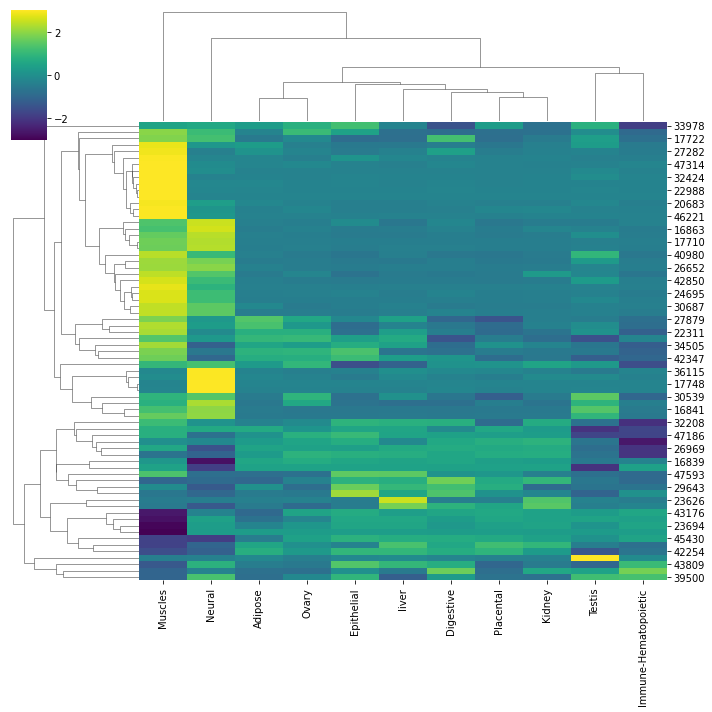

In [15]:
psi_tissue['std']=psi_tissue[tissues].std(axis = 1, skipna = True) 
psi_tissue['mean']=psi_tissue[tissues].mean(axis = 1, skipna = True) 
psi_var=psi_tissue[psi_tissue['std']>20]
g = sns.clustermap(psi_var[tissues],cmap="viridis",z_score=0)


In [16]:
tissue_interest='Muscles'
psi_tissue['Zscore']=(psi_tissue[tissue_interest] - psi_tissue['mean'])/psi_tissue['std']
psi_tissue

,EVENT,Muscles,Neural,Placental,Epithelial,Digestive,liver,Kidney,Adipose,Testis,Immune-Hematopoietic,Ovary,std,mean,Zscore
14460,HsaEX0000112,85.90,92.055,94.47,93.97,96.64,98.88,98.280,95.52,98.395,96.49,90.510,3.925917,94.646364,-2.227853
14475,HsaEX0000140,0.00,1.185,2.52,3.13,0.66,1.83,2.015,1.44,4.605,0.34,1.565,1.319585,1.753636,-1.328930
14476,HsaEX0000143,0.00,0.000,0.00,0.52,0.23,0.00,0.465,0.58,2.065,0.12,0.130,0.602976,0.373636,-0.619653
14510,HsaEX0000234,79.56,98.440,98.31,100.00,100.00,99.76,88.390,85.48,94.800,97.13,93.490,6.830609,94.123636,-2.132114
14625,HsaEX0000543,0.23,1.705,1.39,1.08,2.09,5.62,0.575,1.57,3.200,3.03,3.330,1.540621,2.165455,-1.256282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50136,HsaEX0074508,95.95,94.030,87.90,98.59,98.66,96.89,92.655,96.32,99.275,97.85,96.240,3.306385,95.850909,0.029970
50140,HsaEX0074521,0.82,0.405,0.00,1.96,0.00,1.30,1.815,1.56,4.170,1.50,5.200,1.639593,1.702727,-0.538382
50141,HsaEX0074523,99.85,100.000,98.80,100.00,100.00,100.00,99.840,98.91,99.830,99.47,99.725,0.435861,99.675000,0.401504
50145,HsaEX0074528,59.33,46.030,46.21,70.40,63.25,48.33,51.240,61.95,35.775,35.16,55.620,11.228774,52.117727,0.642303


In [17]:
psi_filtred=psi_tissue[ psi_tissue['Zscore']>2]
len(psi_filtred)

105

In [18]:
psi_filtred=psi_filtred[  (psi_filtred['mean']>1) &   (psi_filtred['mean']<90) ]
psi_filtred=psi_filtred[  psi_filtred[tissue_interest]>15 ]
len(psi_filtred)

61

## Clustering and visualization

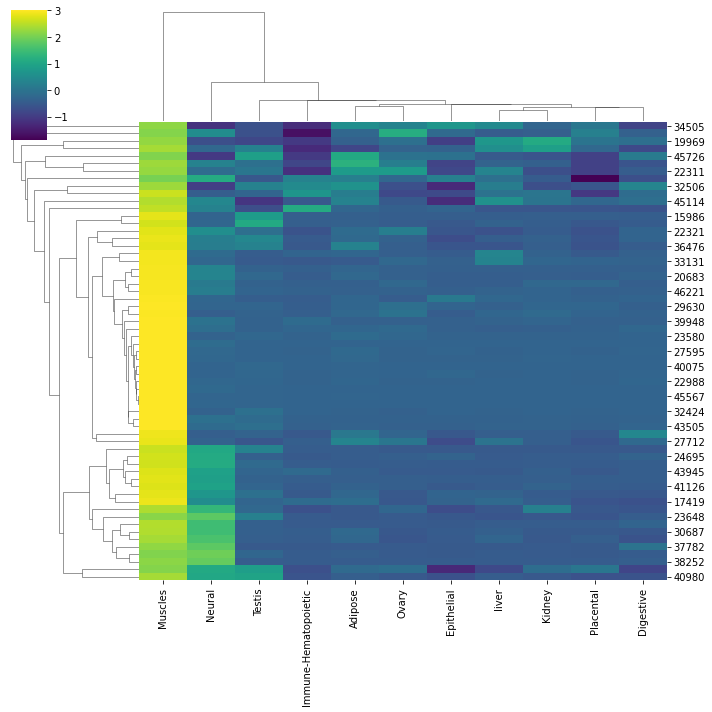

In [19]:
g = sns.clustermap(psi_filtred[tissues],cmap="viridis",z_score=0)


### Prepare the list of events in NEASE format

In [20]:
event_cord=pd.merge(annot,psi_filtred['EVENT'])    


In [21]:
event_cord['start']= event_cord['COORD_o'].apply(lambda x: x.split('-')[0].split(':')[1])
event_cord['end']= event_cord['COORD_o'].apply(lambda x: x.split('-')[1])
#event_cord=event_cord[['GENE','start','end']]

In [22]:
# convert gene names to gene IDs using nease functions
convert_help=nease.functions.database_mapping['Human'][['Gene name','Gene stable ID']]
input=pd.merge(event_cord,convert_help,left_on='GENE',right_on='Gene name')
input=input[['Gene stable ID','start','end']].drop_duplicates()
input.head(10)

,Gene stable ID,start,end
0,ENSG00000009307,114741527,114741673
107,ENSG00000068305,99703362,99703385
133,ENSG00000073921,85960675,85960777
196,ENSG00000077549,19342752,19342864
231,ENSG00000079805,10803639,10803668
336,ENSG00000083544,60547405,60547491
370,ENSG00000086598,123587611,123587631
381,ENSG00000087274,2909339,2909431
439,ENSG00000089597,62634310,62634375
509,ENSG00000099204,114453379,114453483


## NEASE analysis


In [23]:
# Run nease with standard input.
events=nease.run(input, organism='Human')

Delta PSI column was not found. Proceeding with all events (no filtering)

		Data Summary
**************************************************
11 protein domains are affected by AS.
7 of the affected domains have known interactions.
50 protein interactions/binding affected.

**************************************************
Running enrichment analysis...
NEASE enrichment done.


In [24]:
# Run on KEGG gene set
events.classic_enrich(gseapy_databases=['KEGG_2019_Human']).head(10)

2021-04-23 13:58:04,297 Warning: No enrich terms using library KEGG_2019_Human when cutoff = 0.05


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2019_Human,Endocytosis,4/244,0.004529,0.163831,0,0,6.439542,34.756138,CAPZB;CLTC;GBF1;DNM2
1,KEGG_2019_Human,Endocrine and other factor-regulated calcium reabsorption,2/48,0.007724,0.163831,0,0,16.324036,79.390737,CLTC;DNM2
2,KEGG_2019_Human,N-Glycan biosynthesis,2/50,0.008359,0.163831,0,0,15.642296,74.839575,GANAB;RPN2
3,KEGG_2019_Human,Protein processing in endoplasmic reticulum,3/165,0.010570,0.163831,0,0,7.045228,32.054087,GANAB;RPN2;UBE4B
4,KEGG_2019_Human,Bacterial invasion of epithelial cells,2/74,0.017673,0.201628,0,0,10.415618,42.034533,CLTC;DNM2
5,KEGG_2019_Human,Synaptic vesicle cycle,2/78,0.019512,0.201628,0,0,9.865442,38.837355,CLTC;DNM2
6,KEGG_2019_Human,Lysosome,2/123,0.045089,0.399361,0,0,6.182442,19.160087,CLTC;AP3B1
39,KEGG_2019_Human,Ubiquitin mediated proteolysis,1/137,0.315152,0.449280,0,0,2.697304,3.114576,UBE4B
38,KEGG_2019_Human,Apelin signaling pathway,1/137,0.315152,0.449280,0,0,2.697304,3.114576,MEF2A
37,KEGG_2019_Human,Spliceosome,1/134,0.309432,0.449280,0,0,2.758563,3.235840,PRPF18


In [25]:
# Get list of all protein domais affected by AS.
# A link to DIGGER database for lost/gained domain and their binding.

events.get_edges().head(10)

,Gene name,NCBI gene ID,dPSI,Pfam ID,Number of affected interactions,Affected binding,Affected binding (NCBI)
0,TPM1,7168,-,PF00261,18,"MYH2,MYH7B,MYH6,TPM2,TNNT1,TPM3,ACTA2,TPM4,MYH4,MYH9,MYO19,TNNI1,TNNT2,ACTC1,TPM1,MYH1,MYH8,MYO18A","4620,57644,4624,4626,7169,7170,59,7171,4622,4627,80179,7168,7135,7139,70,7138,4619,399687"
1,DNM2,1785,-,PF01031,9,"PLK1,PLEKHA4,TIAM2,DNM2,DNM3,CDK9,DNM1,DDX39B,H2AC4","5347,57664,26230,1785,26052,1025,1759,8335,7919"
2,TMED2,10959,-,PF01105,8,"TMED1,EIF3I,TMED7,TMED10,TMED9,TMED3,TMED4,TMED5","11018,8668,51014,10972,54732,23423,222068,50999"
3,LIMS1,3987,-,PF00412,8,"BMP2K,DAPK1,EHMT2,ILK,PXN,LPXN,TRIP6,STK11","55589,1612,10919,3611,5829,9404,7205,6794"
4,IMPDH2,3615,-,PF00478,4,"IMPDH1,EIF4B,U2AF2,IMPDH2","3614,1975,11338,3615"
5,ASB8,140461,-,PF00023,2,"TUBB3,HIF1AN","10381,55662"
6,DST,667,-,PF02187,1,CALM1,801


### NEASE enrichment


In [26]:
# Run nease enrichment on affected edges

events.enrich(database=['Reactome']).head(25)

NEASE enrichment for the pathway databases:
 ['Reactome']
Found 3 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,R-HSA-397014,Muscle contraction,Reactome,"TPM1 (10), DST (1), LIMS1 (1)",1.954256e-13,1.772510e-10,41.384975
1,R-HSA-445355,Smooth Muscle Contraction,Reactome,"TPM1 (5), DST (1), LIMS1 (1)",2.103439e-09,1.271880e-06,34.605842
2,R-HSA-390522,Striated Muscle Contraction,Reactome,TPM1 (9),6.546757e-15,1.187582e-11,32.659807
3,R-HSA-73817,Purine ribonucleoside monophosphate biosynthesis,Reactome,IMPDH2 (2),1.984257e-04,8.998606e-02,8.525096
4,R-HSA-8956320,Nucleobase biosynthesis,Reactome,IMPDH2 (2),2.686088e-04,9.745129e-02,8.222254
5,R-HSA-6811434,COPI-dependent Golgi-to-ER retrograde traffic,Reactome,TMED2 (4),3.879234e-04,1.172822e-01,7.854703
6,R-HSA-6807878,COPI-mediated anterograde transport,Reactome,TMED2 (4),8.540919e-04,2.154481e-01,7.065472
7,R-HSA-177504,Retrograde neurotrophin signalling,Reactome,DNM2 (3),9.501568e-04,2.154481e-01,6.958883
8,R-HSA-446343,Localization of the PINCH-ILK-PARVIN complex to focal adhesions,Reactome,LIMS1 (2),1.222113e-03,2.463237e-01,6.707174
9,R-HSA-2132295,MHC class II antigen presentation,Reactome,DNM2 (3),1.407671e-03,2.501453e-01,6.565819


In [27]:
events.enrich(database=['KEGG']).head(25)

NEASE enrichment for the pathway databases:
 ['KEGG']
Found 4 enriched pathways after multiple testing correction.



,Pathway ID,Pathway name,Source,Spliced genes (number of interactions affecting the pathway),p_value,adj p_value,Nease score
0,path:hsa04260,Cardiac muscle contraction - Homo sapiens (human),KEGG,TPM1 (7),1.160900e-09,3.726489e-07,20.574070
1,path:hsa05414,Dilated cardiomyopathy (DCM) - Homo sapiens (human),KEGG,TPM1 (7),8.845810e-08,1.264270e-05,16.240737
2,path:hsa05410,Hypertrophic cardiomyopathy (HCM) - Homo sapiens (human),KEGG,TPM1 (7),1.181561e-07,1.264270e-05,15.951259
3,path:hsa04261,Adrenergic signaling in cardiomyocytes - Homo sapiens (human),KEGG,"TPM1 (7), DST (1)",2.683375e-05,2.153408e-03,14.885800
4,path:hsa05100,Bacterial invasion of epithelial cells - Homo sapiens (human),KEGG,"DNM2 (3), LIMS1 (2)",4.877012e-03,1.956901e-01,7.528173
5,path:hsa04721,Synaptic vesicle cycle - Homo sapiens (human),KEGG,DNM2 (3),2.005576e-03,1.287580e-01,6.211824
6,path:hsa04530,Tight junction - Homo sapiens (human),KEGG,"TPM1 (6), LIMS1 (1)",2.472359e-03,1.322712e-01,6.002583
7,path:hsa00983,Drug metabolism - other enzymes - Homo sapiens (human),KEGG,IMPDH2 (2),3.811824e-03,1.747993e-01,5.569648
8,path:hsa04961,Endocrine and other factor-regulated calcium reabsorption - Homo sapiens (human),KEGG,DNM2 (3),6.563070e-03,2.340828e-01,5.026297
9,path:hsa00230,Purine metabolism - Homo sapiens (human),KEGG,IMPDH2 (2),3.752595e-02,1.000000e+00,3.282722


### Pathway specific analysis

In [28]:
events.path_analysis('R-HSA-445355')

Enrichment of the pathway: Smooth Muscle Contraction.

Overall p_value:  2.1034392509195673e-09




,Spliced genes,NCBI gene ID,Gene knwon to be in the pathway,Percentage of edges associated to the pathway,p_value,Affected binding (edges),Affected binding (NCBI)
0,TPM1,7168,True,5/18,1.135313e-08,"TPM2,TPM3,ACTA2,TPM4,TPM1","7169,7170,59,7171,7168"
1,DST,667,False,1/1,4.269350e-03,CALM1,801
2,LIMS1,3987,False,1/8,3.364988e-02,PXN,5829


In [29]:
events.Vis_path('R-HSA-445355')

Enrichment of the pathway: Smooth Muscle Contraction.

Overall p_value:  2.1034392509195673e-09


Visualization of the pathway generated in: Smooth Muscle Contraction.html
